In [15]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import hvplot.pandas as hvplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
# Load the data into a Pandas DataFrame
crypto_market_data_df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
crypto_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [17]:
# Generate summary statistics
crypto_market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [18]:
crypto_market_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [19]:
# Review the columns int the DataFrame
crypto_market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [20]:
# Plot your data to see what's in your DataFrame
crypto_market_data_df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

### Prepare the Data

In [21]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
crypto_scaled_df=StandardScaler().fit_transform(crypto_market_data_df)
crypto_scaled_df[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [46]:
# Create a DataFrame with the scaled data
crypto_transformed_df= pd.DataFrame(crypto_scaled_df, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d', 'price_change_percentage_60d', 'price_change_percentage_200d',	'price_change_percentage_1y'])
# Copy the crypto names from the original data
coins = list(crypto_market_data_df.index) #this returns a list of all the coin names from the original data
crypto_transformed_df['coin_id']= coins
# Set the coinid column as index
crypto_transformed_df=crypto_transformed_df.set_index('coin_id')
# Display sample data
crypto_transformed_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [47]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1,12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(crypto_transformed_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k, 'inertia': inertia}   

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


In [48]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k",
    y="inertia",
    title= "Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** In analyzing the elbow it appears the best best value for K is 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [49]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, random_state=1)

In [50]:
# Fit the K-Means model using the scaled data
k_model.fit(crypto_transformed_df)  

KMeans(n_clusters=4, random_state=1)

In [51]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = k_model.predict(crypto_transformed_df)
# View the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0])

In [38]:
# Create a copy of the DataFrame
predicted_clusters = crypto_transformed_df.copy()

In [52]:
# Add a new column to the DataFrame with the predicted clusters
predicted_clusters["predicted_cluster"] = k_4
# Display sample data
predicted_clusters.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [53]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
predicted_clusters.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='predicted_cluster',
    hover_cols = 'coin_id'
)

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

### Optimize Clusters with Principal Component Analysis.

In [54]:
# Create a PCA model instance and set `n_components=3`.
pca_mdl = PCA(n_components=3)

In [56]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_clusters = pca_mdl.fit_transform(predicted_clusters)

# View the first five rows of the DataFrame. 
pca_clusters[:5]

array([[ 0.44890795, -1.24537573, -0.8506404 ],
       [ 0.49536709, -0.899823  , -1.31755943],
       [-0.81884571,  0.07189909,  0.69501507],
       [-0.84035711,  0.08005407,  0.54435952],
       [ 0.81324004, -2.66952035, -1.64332113]])

In [59]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca_mdl.explained_variance_ratio_

array([0.34871677, 0.31363391, 0.22627118])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Adding up the variances would be 0.34871677+0.31363391+0.22627118=0.88862186 so the total explained variance is 89% with 11% lost

In [60]:
# Create a new DataFrame with the PCA data.
pca_clusters_df = pd.DataFrame(
    pca_clusters, 
    columns=["PCA_1","PCA_2","PCA_3"]
)
# Copy the crypto names from the original data
pca_clusters_df['coin_id'] = list(predicted_clusters.index)
# Set the coinid column as index
pca_clusters_df = pca_clusters_df.set_index('coin_id')
# Display sample data
pca_clusters_df

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,0.448908,-1.245376,-0.850640
ethereum,0.495367,-0.899823,-1.317559
tether,-0.818846,0.071899,0.695015
ripple,-0.840357,0.080054,0.544360
bitcoin-cash,0.813240,-2.669520,-1.643321
binancecoin,0.822871,-1.682096,-0.905203
chainlink,0.913868,-1.128684,-2.730038
cardano,0.811102,-1.113378,-1.598655
litecoin,0.258728,-0.946884,-1.103560


### Find the Best Value for k Using the PCA Data

In [62]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_values:
    # Create a KMeans model using the loop counter for the number of clusters
    k_model = KMeans(n_clusters=i, random_state=1)
    # Fit the model to the data using PCA DataFrame
    k_model.fit(pca_clusters_df)
    # Append the model.inertia_ (which measures clustering quality) to the inertia list
    inertia2.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {
    'k': k_values,
    'inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df2 = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df2

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


In [64]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df2.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best k-value is `k=4` when using PCA data


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it is the same `k` value as found using the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [69]:
# Initialize the K-Means model using the best value for k
km_mdl = KMeans(n_clusters=4, random_state=1)

In [70]:
# Fit the K-Means model using the PCA data
km_mdl.fit(pca_clusters_df)

KMeans(n_clusters=4, random_state=1)

In [71]:
# Predict the clusters to group the cryptocurrencies using the PCA data
k_4 = km_mdl.predict(pca_clusters_df)

# Print the resulting array of cluster values.
k_4

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [74]:
# Create a copy of the DataFrame with the PCA data
cpy_pca_clusters_df = pca_clusters_df.copy()

# Add a new column to the DataFrame with the predicted clusters
cpy_pca_clusters_df['PredictedCluster'] = k_4

# Display sample data
cpy_pca_clusters_df

,PCA_1,PCA_2,PCA_3,PredictedCluster
coin_id,,,,
bitcoin,0.448908,-1.245376,-0.850640,1
ethereum,0.495367,-0.899823,-1.317559,1
tether,-0.818846,0.071899,0.695015,0
ripple,-0.840357,0.080054,0.544360,0
bitcoin-cash,0.813240,-2.669520,-1.643321,1
binancecoin,0.822871,-1.682096,-0.905203,1
chainlink,0.913868,-1.128684,-2.730038,1
cardano,0.811102,-1.113378,-1.598655,1
litecoin,0.258728,-0.946884,-1.103560,1


In [76]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
cpy_pca_clusters_df.hvplot.scatter(
    x="PCA_1",
    y="PCA_2",
    by = 'PredictedCluster',
    hover_cols='coin_id'
)


:NdOverlay   [PredictedCluster]
   :Scatter   [PCA_1]   (PCA_2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [77]:
# Use the columns from the original scaled DataFrame as the index.
market_data_scaled_df = pd.DataFrame(crypto_market_data_df)

# Get the column names from the DataFrame
columns_list = market_data_scaled_df.columns.tolist()

# Set the columns as the index
market_data_scaled_df.set_index(columns_list, inplace=True)


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** By looking the heatmap below in cell [198] we can see that the Principal Component 0 and Price Change Percentage for 1 yr have the highest correlation
        

In [78]:
# Initialize the PCA model specifying the number of components
PCA_model = PCA(n_components=3)

# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components
principal_components = PCA_model.fit_transform(crypto_market_data_df)

# Display sample data
crypto_market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [79]:
# Fit PCA to your data
PCA_model.fit(crypto_market_data_df)

# Loop through each principal component
for i, component in enumerate(PCA_model.components_):
    print(f"Principal Component {i + 1}:")
    
    # Sort coefficients by absolute value to identify features with strongest influence
    sorted_indices = np.argsort(np.abs(component))[::-1]
    
    # Print the top features with strongest influence
    for j in sorted_indices:
        feature_name = crypto_market_data_df.columns[j]  # Use df_crypto_market_data columns
        coefficient = component[j]
        print(f"Feature: {feature_name}, Coefficient: {coefficient:.4f}")
    
    print("\n")

Principal Component 1:
Feature: price_change_percentage_1y, Coefficient: 0.9538
Feature: price_change_percentage_200d, Coefficient: 0.3003
Feature: price_change_percentage_60d, Coefficient: 0.0088
Feature: price_change_percentage_24h, Coefficient: -0.0015
Feature: price_change_percentage_30d, Coefficient: 0.0010
Feature: price_change_percentage_14d, Coefficient: -0.0007
Feature: price_change_percentage_7d, Coefficient: -0.0002


Principal Component 2:
Feature: price_change_percentage_200d, Coefficient: 0.9376
Feature: price_change_percentage_1y, Coefficient: -0.2967
Feature: price_change_percentage_60d, Coefficient: 0.1584
Feature: price_change_percentage_30d, Coefficient: 0.0880
Feature: price_change_percentage_14d, Coefficient: 0.0066
Feature: price_change_percentage_24h, Coefficient: 0.0039
Feature: price_change_percentage_7d, Coefficient: -0.0013


Principal Component 3:
Feature: price_change_percentage_60d, Coefficient: 0.8992
Feature: price_change_percentage_30d, Coefficient: 0.3

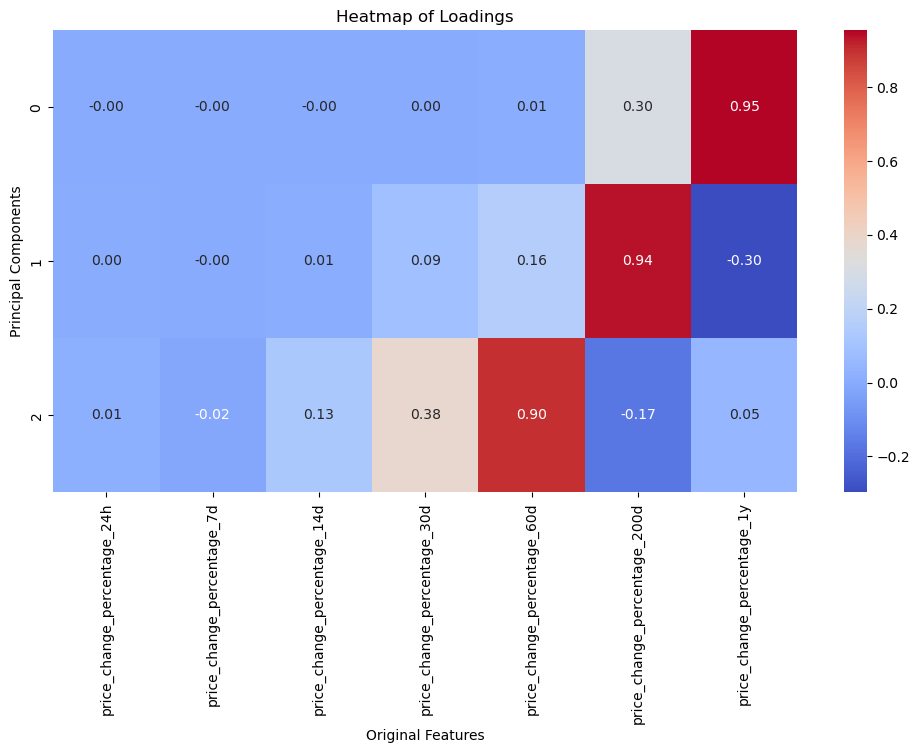

In [80]:
# Extract loadings from the PCA model
loadings = PCA_model.components_

# Create a heatmap of loadings
plt.figure(figsize=(12, 6))
sns.heatmap(loadings, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=crypto_market_data_df.columns)
plt.title("Heatmap of Loadings")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()